# Chapter 01: Exploratory Data Analysis

- Nesse capítulo será abordado os princípais tópicos de estatística para descrevar e analisar previamente os dados.

Em contraste com a teoria pura e natural da probabilidade, a estatística por sua vez é uma ciência aplicada que se concentra na análise e modelagem dos dados.

### Elements of Structured Data

Data comes from many sources: Sensor measuraments, events, text, images and videos.
    

* **Key terms for data types**

    - Continuos: Em um único intervalo, pode haver infinitos valores. Interval, numeric, float.

    - Discrete: Data that can take on only integer values, such as counts. Interger, count.

    - Categorical: Data that can take on only specific set of values representing a set of possible categories. nominal.
    
    - Binary: A special case of categorical data with just two categories of values (1/0 , True / False). Boolean

    - Ordinal: Categorical data that has an explicit ordering.
    

### Rectangular Data

- The typical frame of reference for an analysis in data science is a rectangular
data object, like a spreadsheet or database table.

* **Key terms for Rectangular Data**
    - Data frame: Rectangular data (like a spreadsheet) is the basic data structure for statistical and machine
    learning models.
    - Feature: A column in the table is commonly referred to as a feature.
        * Synonyms : attribute, input, predictor, variable
    - Outcome: Many data science projects involve predicting an outcome — often a yes/no outcome (in Table 1- 1, it is “auction was competitive or not”). The features are sometimes used to predict the outcome in an experiment or study.
        * Synonyms: dependent variable, response, target, output
    - Records: A row in the table is commonly referred to as a record.
        * Synonyms: case, example, instance, observation, pattern, sample

# Estudando com códigos

In [2]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [3]:

path = r'D:\CDS\Livros\Estatística\book-practical-statistics\data\raw\state.csv'
df_stats = pd.read_csv(path, sep=';')
df_stats.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


## Key terms for estimate of location

**Algumas medidas de tendência central**
- Média (Sensível a valores extremos)
- Média ponderada (Muito utilizado para dar vantagens a classes com mais pesos, podendo assim ter uma estimativa real da média da população como um todo)
- Mediana (Menos sensível a outliers)
- Mediana ponderada

**Outros termos chaves**
- Outliers (Facilmente mensurado por um box plot)

In [7]:
# mean
print('Média da população:',df_stats['Population'].mean())
print('Média da população após retirar 10% dos dados extremos:',trim_mean(df_stats['Population'], 0.1))
print('Média da taxa de assassinato:',df_stats['Murder.Rate'].mean())
print('Média ponderada da taxa de assassinato:', np.average(df_stats['Murder.Rate'], weights=df_stats['Population']))

print('Mediana da população:',df_stats['Population'].median())


Média da população: 6162876.3
Média da população após retirar 10% dos dados extremos: 4783697.125
Média da taxa de assassinato: 4.066
Média ponderada da taxa de assassinato: 4.445833981123393
Mediana da população: 4436369.5


## Estimativas para grau de dispersão dos dados

**Termos chaves para métricas de variabilidade**
- Desvios: Também chamados de erros ou resíduos. Diferença entre o valor estimado e a estimativa local.
- Variância: Podendo ser chamado de Erro quadrático médio (MSE). É a soma dos quadrados dos desvios diminuídos pela média, e dividido por N-1 em que N é a quantidade total de dados da amostra.
- Desvio padrão: Podendo ser chamado de norma euclidiana. É a raiz quadra da variância.
- Média absoluta dos desvios (MAD)
- Range: É a diferença entre o maior e o menor valor de um dataset.

In [9]:
print('O desvio padrão da população é: ', df_stats['Population'].std())
print('O range interquartílico da diferença de 75% a 25% é: ', (df_stats['Population'].quantile(0.75)-df_stats['Population'].quantile(0.25)))
print('O desvio médio absoluto da mediana da população é: ', robust.scale.mad(df_stats['Population']))

O desvio padrão da população é:  6848235.347401142
O range interquartílico da diferença de 75% a 25% é:  4847308.0
O desvio médio absoluto da mediana da população é:  3849876.1459979336


**Percentils e BoxPlot**

In [10]:
print('Os percentis para a taxa de assassinato são: ', df_stats['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95]))

Os percentis para a taxa de assassinato são:  0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


In [17]:
# Table 1.4
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(df_stats['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.T)

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


In [25]:
# Table 1.5
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(df_stats['Population'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.T)

                5.0%       25.0%      50.0%       75.0%       95.0%
Population  689529.0  1833004.25  4436369.5  6680312.25  19118545.6


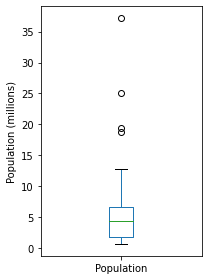

In [24]:
# Boxplot
ax = (df_stats['Population']/1000000).plot.box(figsize=(3,4))
ax.set_ylabel('Population (millions)')
plt.tight_layout()
plt.show()
